In [23]:
import pandas as pd
import numpy as np

filename = "train.csv"
df = pd.read_csv(filename)
print(df.columns)

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')


In [0]:
def reset_df():
  global df
  df = pd.read_csv("train.csv")

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
class Visualizer:
  def __init__(self):
    pass

  def getCrossTab(self, feature_name, label, dataframe):
    data_ct = pd.crosstab(dataframe[feature_name], dataframe[label], margins = False)
    return data_ct

  def drawBoxPlot(self, feature, label, df_, subplots = False, nrows = 0, ncolumns = 0):
    if not subplots:
      sns.boxplot(x=label, y = feature, data = df_)
    else:
      fig, ax = plt.subplots(nrows, ncolumns, figsize = (15,15))
      fig.subplots_adjust(hspace = 0.8, wspace = 0.8)
      d = 0
      for row in range(nrows):
        for col in range(ncolumns):
          sns.boxplot(x=label, y=feature[d], data=df_, ax = ax[row, col])
          d += 1
          if d >= len(feature):
            return

  def drawHist(self, feature, df_, subplots = False, nrows = 0, ncolumns = 0):
    if not subplots:
        plt.hist(df_[feature])
      
    else:
      fig, ax = plt.subplots(nrows, ncolumns, figsize = (15,15))
      fig.subplots_adjust(hspace = 0.8, wspace = 0.8)
      d = 0
      for row in range(nrows):
        for col in range(ncolumns):
          ax[row, col].hist(df_[feature[d]])
          ax[row, col].set_xlabel(feature[d])
          d += 1
          if d >= len(feature):
            return

  def simplePlot(self, feature, label, df_, subplots = False, nrows = 0, ncolumns = 0):
    if not subplots: 
     plt.plot(df_[feature], df_[label])
    else:
      fig, ax = plt.subplots(nrows, ncolumns, figsize = (15,15))
      fig.subplots_adjust(hspace = 0.8, wspace = 0.8)
      d = 0
      for row in range(nrows):
        for col in range(ncolumns):
          ax[row, col].plot(df_[feature[d]], df_[label])
          ax[row, col].set_xlabel(feature[d])
          d += 1
          if d >= len(feature):
            return

  def hexBins(self, feature, label, df_, subplots = False, nrows = 0, ncolumns = 0):
    if not subplots:
      x = df_[feature]
      y = df_[label]
      plt.hexbin(x, y, gridsize=30, cmap='Blues')


In [61]:
df["Engine"].shape[1]

IndexError: ignored

In [0]:
reset_df()

In [0]:
for x in range(df.shape[0]):
    val = df.loc[x, "Engine"]
    i = 0
    if not (type(val) == float):
      df.loc[x, "Engine"] = int((df.loc[x, "Engine"]).split()[0])

In [0]:
import math 
for x in range(df["Engine"].shape[0]):
  if type(df.loc[x, 'Engine']) == float:
    print(math.isnan(df.loc[x,"Engine"]))

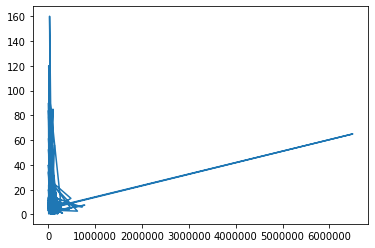

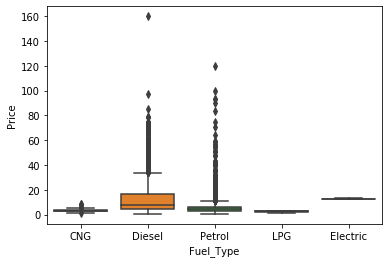

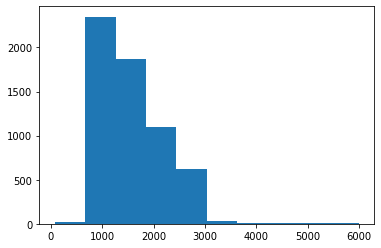

In [71]:
%matplotlib inline
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy = 'mean')
df['Engine'] = si.fit_transform(np.array(df['Engine']).reshape(-1,1))

visualizer = Visualizer()
feature_name = "Price"
label = "Kilometers_Driven"
visualizer.simplePlot(feature = label, label = feature_name, df_ = df)
label = "Fuel_Type"
plt.figure()
visualizer.drawBoxPlot(feature = feature_name, label = label, df_=df)
plt.figure()
visualizer.drawHist(feature = "Engine", df_ = df)

In [0]:
df.drop('New_Price', axis = 1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65
